# 6. Egoroff's Theorem

**Goal:** Visualize how a.e. convergence becomes uniform after removing a small set.

**Theorem:** On a finite measure space, if $f_n \to f$ a.e., then for every $\delta > 0$ there exists $E$ with $\mu(E) < \delta$ such that $f_n \to f$ uniformly on $X \setminus E$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Example: $f_n(x) = x^n$ on $[0,1]$

Converges a.e. to 0, but not uniformly (sup near $x=1$ stays close to 1).
Remove $[1-\delta, 1]$ to get uniform convergence on $[0, 1-\delta]$.

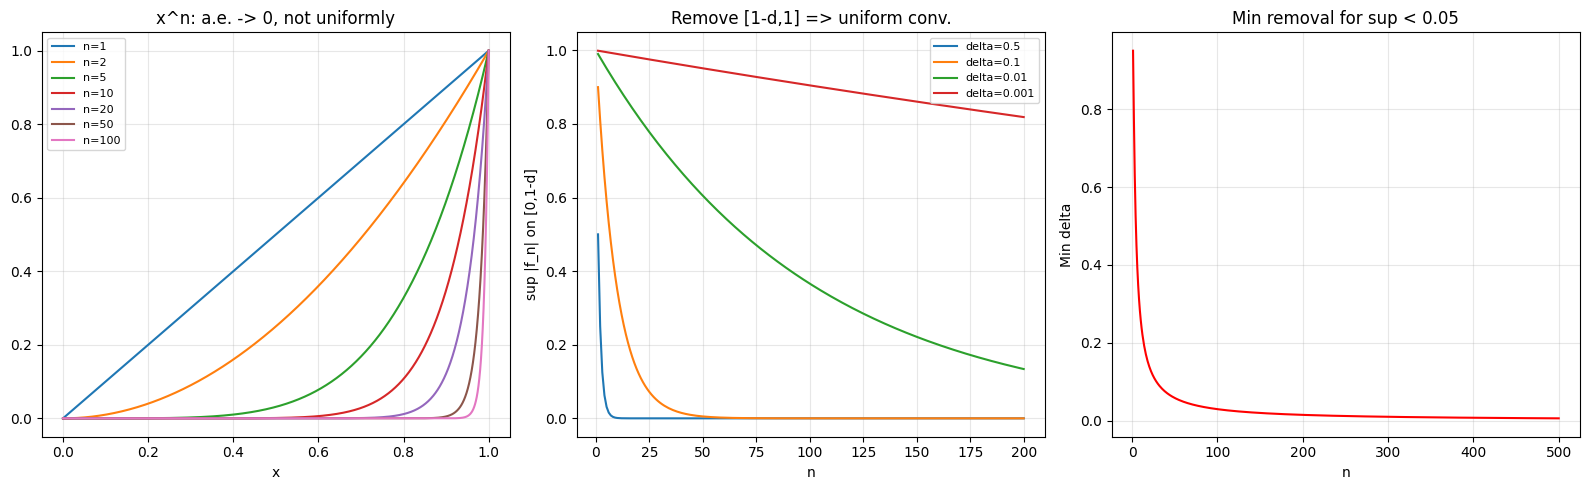

In [2]:
x = np.linspace(0, 1, 1000)
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

ax = axes[0]
for n in [1, 2, 5, 10, 20, 50, 100]:
    ax.plot(x, x**n, label=f'n={n}')
ax.set_xlabel('x'); ax.set_title('x^n: a.e. -> 0, not uniformly', fontsize=12)
ax.legend(fontsize=8); ax.grid(True, alpha=0.3)

ax = axes[1]
ns = np.arange(1, 201)
for d in [0.5, 0.1, 0.01, 0.001]:
    ax.plot(ns, (1-d)**ns, label=f'delta={d}')
ax.set_xlabel('n'); ax.set_ylabel('sup |f_n| on [0,1-d]')
ax.set_title('Remove [1-d,1] => uniform conv.', fontsize=12)
ax.legend(fontsize=8); ax.grid(True, alpha=0.3)

ax = axes[2]
eps = 0.05
ns_p = np.arange(1, 501)
ax.plot(ns_p, 1 - eps**(1.0/ns_p), 'r-')
ax.set_xlabel('n'); ax.set_ylabel('Min delta')
ax.set_title(f'Min removal for sup < {eps}', fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Diagonal Construction

For $\varepsilon_k = 1/k$, find $N_k$ so $\mu(B_{N_k}(1/k)) < \delta/2^k$.
Then $E = \bigcup_k B_{N_k}$ has $\mu(E) < \delta$ and $f_n \to f$ uniformly on $X \setminus E$.

In [3]:
delta = 0.05
print(f'Egoroff construction with delta = {delta}:')
print(f'{"k":>3} {"eps_k":>8} {"budget":>12} {"N_k":>8} {"mu(B)":>12}')
print('-'*50)
total = 0
for k in range(1, 11):
    eps_k = 1.0/k
    budget = delta/2**k
    N_k = max(1, int(np.ceil(np.log(1-budget)/np.log(eps_k)))) if eps_k < 1 else 1
    mu_B = 1 - eps_k**(1.0/N_k)
    total += mu_B
    print(f'{k:>3} {eps_k:>8.4f} {budget:>12.6f} {N_k:>8} {mu_B:>12.6f}')
print(f'\nTotal mu(E) <= {total:.6f} < {delta}')

Egoroff construction with delta = 0.05:
  k    eps_k       budget      N_k        mu(B)
--------------------------------------------------
  1   1.0000     0.025000        1     0.000000
  2   0.5000     0.012500        1     0.500000
  3   0.3333     0.006250        1     0.666667
  4   0.2500     0.003125        1     0.750000
  5   0.2000     0.001563        1     0.800000
  6   0.1667     0.000781        1     0.833333
  7   0.1429     0.000391        1     0.857143
  8   0.1250     0.000195        1     0.875000
  9   0.1111     0.000098        1     0.888889
 10   0.1000     0.000049        1     0.900000

Total mu(E) <= 7.071032 < 0.05


## Failure on Infinite Measure Spaces

$f_n = \mathbf{1}_{[n,n+1]}$ on $\mathbb{R}$: converges to 0 everywhere, but no finite removal gives uniform convergence.

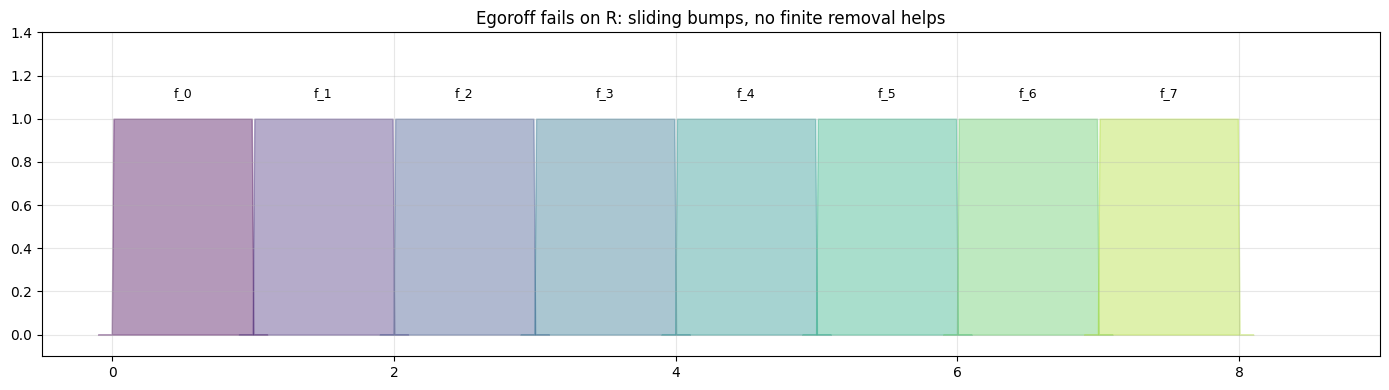

In [4]:
fig, ax = plt.subplots(figsize=(14, 4))
for n in range(8):
    xl = np.linspace(n-0.1, n+1.1, 100)
    ax.fill_between(xl, ((xl>=n)&(xl<=n+1)).astype(float), alpha=0.4, color=plt.cm.viridis(n/8))
    ax.text(n+0.5, 1.1, f'f_{n}', ha='center', fontsize=9)
ax.set_xlim(-0.5, 9); ax.set_ylim(-0.1, 1.4)
ax.set_title('Egoroff fails on R: sliding bumps, no finite removal helps', fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Key Takeaways

1. **Egoroff** bridges a.e. and uniform convergence via removing a small set.
2. Uses a **diagonal argument** across precision levels.
3. **Finite measure essential** — fails on $\mathbb{R}$.